## Modelo de classificação para previsão do intervalo da taxa de rendimento bruto (classes: 'nenhum', '> 0% e < 10%', '>= 10%' ) de um título do tesouro direto se comprar em um mês e vender no próximo com base em indicadores técnicos calculados

In [30]:
# importar de bibliotecas

# data
import numpy as np
import pandas as pd

# ml
from keras import models
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# plot
import seaborn as sns

# Configurando as opções de impressão
np.set_printoptions(suppress=True)

In [31]:
# Carregar o modelo
model = load_model('model_class.keras')

In [32]:
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_443 (Dense)           (None, 512)               24576     
                                                                 
 dropout_366 (Dropout)       (None, 512)               0         
                                                                 
 dense_444 (Dense)           (None, 512)               262656    
                                                                 
 dropout_367 (Dropout)       (None, 512)               0         
                                                                 
 dense_445 (Dense)           (None, 256)               131328    
                                                                 
 dropout_368 (Dropout)       (None, 256)               0         
                                                                 
 dense_446 (Dense)           (None, 256)             

<img src = 'model_class_acuracia_train_val.png'/>
<img src = 'model_class_loss_train_val.png'/>

In [33]:
# Dados de treino e teste 
X_test = pd.read_csv('X_test_class.csv', sep = ';').values
y_test = pd.read_csv('y_test_class.csv', sep = ';').values

In [34]:
X_test.shape

(6228, 47)

In [35]:
y_test.shape

(6228, 3)

In [36]:
results = model.evaluate(X_test, y_test)

195/195 [==============================] - 1s 2ms/step - loss: 0.4660 - accuracy: 0.8272


In [37]:
# Fazendo a predição
predicao = model.predict(X_test)

195/195 [==============================] - 1s 2ms/step


In [38]:
predicao.shape

(6228, 3)

In [39]:
# Obtendo os valores das classificações
pred_labels = []
test_labels1 = []
for i, p in enumerate(predicao):
    pred_labels.append(np.argmax(p))
    test_labels1.append(np.argmax(y_test[i]))

In [40]:
# Criando uma 
cm = confusion_matrix(test_labels1, pred_labels)
cm

array([[1617,  410,   49],
       [ 330, 1568,  178],
       [  18,   91, 1967]], dtype=int64)

classe:


<Axes: >

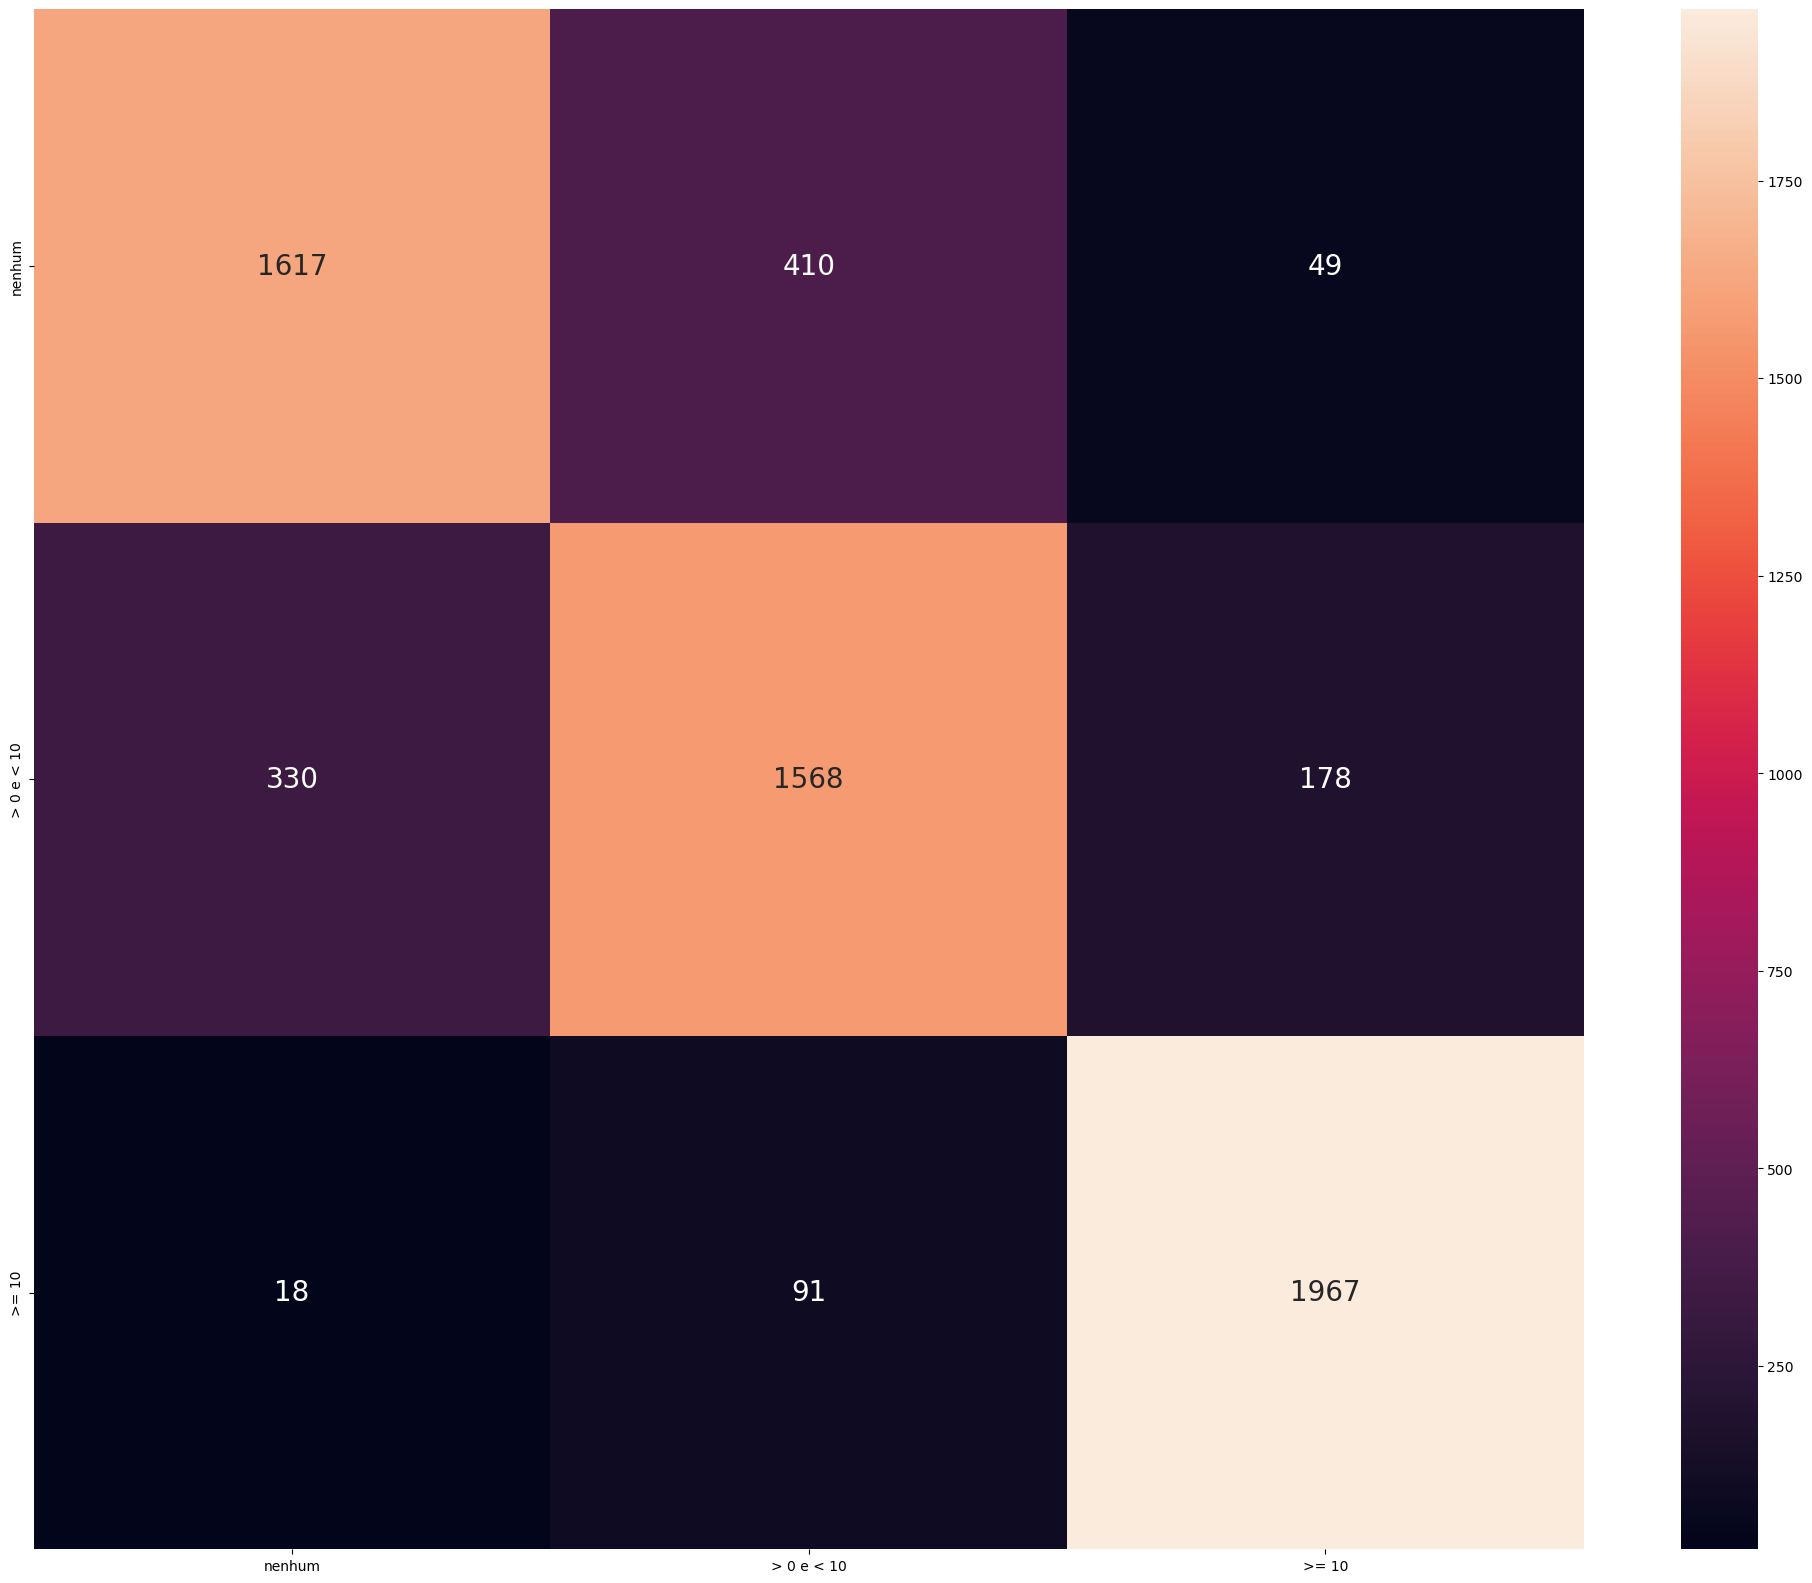

In [41]:
print('classe:') 
xlabels = ['nenhum', '> 0 e < 10', '>= 10']
ylabels = ['nenhum', '> 0 e < 10', '>= 10']
plt.figure(figsize=(25, 20))
sns.heatmap(cm, annot=True, fmt = 'g', xticklabels = xlabels, yticklabels = ylabels, annot_kws={"size": 20})

In [42]:
print(classification_report(test_labels1, pred_labels))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2076
           1       0.76      0.76      0.76      2076
           2       0.90      0.95      0.92      2076

    accuracy                           0.83      6228
   macro avg       0.83      0.83      0.83      6228
weighted avg       0.83      0.83      0.83      6228



**Acurácia**:

A acurácia de 0.8 é bastante decente, indicando que o modelo está correto em 80% das previsões.

**Curvas de Aprendizado**:

Se as curvas de aprendizado para treinamento e validação estão próximas e não há grandes divergências, isso sugere que o modelo não está sofrendo de overfitting.

**F1 Score**:

O F1-score é uma métrica útil, especialmente quando as classes não estão balanceadas. Os valores de F1-score para cada classe e a média (macro avg) estão em um nível aceitável.
Balanceamento de Classes:

O fato de os dados serem balanceados é positivo, e as métricas parecem equilibradas entre as classes.

**Interpretação do F1-Score**:

Se o F1-score médio (macro avg) atende aos requisitos do seu problema, o modelo pode ser considerado bom.